# **Analyzing Austin Animal Center Data for Enhanced Adoption Strategies**

## **Team Collaboration**
1. Dishant Bhansali
2. Shashank Guda
3. Vishnu Charugundla

## **Context**

This analysis examines data from the Austin Animal Center on animal intakes, outcomes, and stray locations to understand trends in the city's animal population and identify reasons behind stray animal cases. By analyzing these datasets together, we can gain insights into factors contributing to stray animals in Austin and develop strategies to address the issue.

In [117]:
# Importing libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [118]:
intakes_df = pd.read_csv("D:/Education/Syracuse University/Subjects/Semester 2/Scripting for Data Analysis/Project/Data/Austin_Animal_Center_Intakes_20240425.csv")
outcomes_df = pd.read_csv("D:/Education/Syracuse University/Subjects/Semester 2/Scripting for Data Analysis/Project/Data/Austin_Animal_Center_Outcomes_20240425.csv") 
straymap_df = pd.read_csv("D:/Education/Syracuse University/Subjects/Semester 2/Scripting for Data Analysis/Project/Data/Austin_Animal_Center_Stray_Map_20240425.csv")

## **Analysis**

### **a.) Intakes**

In [119]:
# Checking the head of the dataframe
intakes_df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
1,A665739,*Alana,10/22/2013 11:11:00 AM,October 2013,Austin (TX),Stray,Normal,Cat,Intact Female,1 month,Domestic Medium Hair Mix,Black
2,A665763,NaN,10/22/2013 03:10:00 PM,October 2013,E Riverside Dr/Royal Crest Dr in Austin (TX),Stray,Normal,Dog,Intact Male,4 months,Cairn Terrier Mix,Tan/White
3,A379998,Disciple,10/23/2013 11:42:00 AM,October 2013,51St And Grover in Austin (TX),Stray,Normal,Dog,Intact Male,10 years,Pit Bull,Black
4,A634503,Otter,10/01/2013 02:49:00 PM,October 2013,Manor (TX),Owner Surrender,Normal,Dog,Spayed Female,2 years,Norfolk Terrier Mix,Tan


In [120]:
print(intakes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161797 entries, 0 to 161796
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         161797 non-null  object
 1   Name              115235 non-null  object
 2   DateTime          161797 non-null  object
 3   MonthYear         161797 non-null  object
 4   Found Location    161797 non-null  object
 5   Intake Type       161797 non-null  object
 6   Intake Condition  161797 non-null  object
 7   Animal Type       161797 non-null  object
 8   Sex upon Intake   161795 non-null  object
 9   Age upon Intake   161796 non-null  object
 10  Breed             161797 non-null  object
 11  Color             161797 non-null  object
dtypes: object(12)
memory usage: 14.8+ MB
None


**Note:** `intakes_df` consits of 12 columns and 161798 rows

In [121]:
# Checking for missing values
print(intakes_df.isnull().sum())

Animal ID               0
Name                46562
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         2
Age upon Intake         1
Breed                   0
Color                   0
dtype: int64


**Note:** There are around 46564 nulls in the _Name_ column in `intakes` dataframe

In [122]:
# Summary statistics for numerical columns
print(intakes_df.describe())

       Animal ID    Name                DateTime  MonthYear Found Location  \
count     161797  115235                  161797     161797         161797   
unique    145226   28174                  112084        127          66160   
top      A721033    Luna  09/23/2016 12:00:00 PM  June 2015    Austin (TX)   
freq          33     703                      64       2189          29680   

       Intake Type Intake Condition Animal Type Sex upon Intake  \
count       161797           161797      161797          161795   
unique           6               20           5               5   
top          Stray           Normal         Dog     Intact Male   
freq        110802           138012       89387           54531   

       Age upon Intake                   Breed        Color  
count           161796                  161797       161797  
unique              55                    2922          642  
top             1 year  Domestic Shorthair Mix  Black/White  
freq             26671   

The output of `intakes_df.describe()` provides statistical summaries for numerical and categorical columns in the Austin Animal Center Intakes dataset:

### Numerical Columns:
- **Animal ID:**
  - Total count: 161,798
  - Unique IDs: 145,226
  - Most frequent ID: A721033 (33 occurrences)
- **Name:**
  - Total count: 115,234
  - Unique names: 28,171
  - Most frequent name: Luna (703 occurrences)
- **DateTime:**
  - Unique entries: 112,085
  - Most frequent date: 09/23/2016 12:00:00 PM (64 occurrences)
- **MonthYear:**
  - Unique entries: 127
  - Most frequent month: June 2015 (2,189 occurrences)
- **Found Location:**
  - Unique locations: 66,160
  - Most common location: Austin (TX) (29,680 occurrences)
- **Age upon Intake:**
  - Unique entries: 55
  - Most common age: 1 year (26,672 occurrences)

### Categorical Columns:
- **Intake Type:**
  - Unique types: 6
  - Most common type: Stray (110,802 occurrences)
- **Intake Condition:**
  - Unique conditions: 20
  - Most common condition: Normal (138,013 occurrences)
- **Animal Type:**
  - Unique types: 5
  - Most common type: Dog (89,388 occurrences)
- **Sex upon Intake:**
  - Unique entries: 5
  - Most common entry: Intact Male (54,534 occurrences)
- **Breed:**
  - Unique breeds: 2,922
  - Most common breed: Domestic Shorthair Mix (33,380 occurrences)
- **Color:**
  - Unique colors: 642
  - Most common color: Black/White (16,862 occurrences)

In [123]:
intakes_df.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color'],
      dtype='object')

**These are the columns present in the `intakes_df`**
1. **Animal ID:** This column likely serves as a unique identifier for each animal intake record. We can check for duplicates to ensure data integrity.
2. **Name:** This column contains the name of the animal, if available. We can explore the distribution of named vs. unnamed animals.
3. **DateTime:** This column indicates the date and time of the intake. We can extract insights such as the distribution of intakes over time, busiest intake times, etc.
4. **MonthYear:** Similar to DateTime, but possibly aggregated at the month level. We can explore seasonal trends in animal intake.
5. **Found Location:** This column describes where the animal was found. We can analyze common locations and possibly correlate them with other variables.
6. **Intake Type:** Describes the reason for the intake, e.g., stray, owner surrender, etc. We can examine the frequency of each intake type.
7. **Intake Condition:** Describes the condition of the animal upon intake, e.g., healthy, injured, etc. We can analyze the distribution of intake conditions.
8. **Animal Type:** Indicates the type of animal, e.g., dog, cat, etc. We can explore the composition of different animal types.
9. **Sex upon Intake:** Indicates the sex of the animal upon intake, e.g., neutered male, intact female, etc. We can analyze the distribution of sexes.
10. **Age upon Intake:** Describes the age of the animal upon intake. We can explore the distribution of ages and possibly derive insights about age demographics.
11. **Breed:** Indicates the breed of the animal. We can analyze the diversity of breeds and possibly identify common breeds.
12. **Color:** Describes the color of the animal. We can analyze the distribution of colors and identify common color patterns.

In [124]:
# Checking for duplicates in Animal ID column
print("Duplicates in Animal ID:", intakes_df.duplicated(subset=['Animal ID']).sum())

Duplicates in Animal ID: 16571


In [125]:
# Dropping the duplicates
intakes_df.drop_duplicates(subset=['Animal ID'], inplace=True)
print("Duplicates in Animal ID after dropping:", intakes_df.duplicated(subset=['Animal ID']).sum())

Duplicates in Animal ID after dropping: 0


#### **1.) Distribution of intake types**

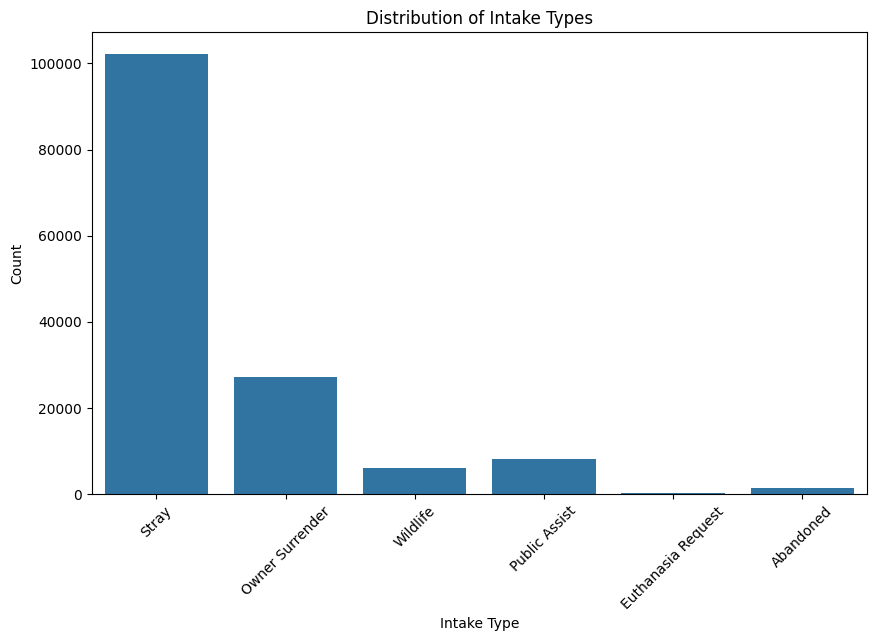

In [126]:
# Visualizing distribution of intake types
plt.figure(figsize=(10, 6))
sns.countplot(x='Intake Type', data=intakes_df)
plt.title('Distribution of Intake Types')
plt.xlabel('Intake Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Note:** The above graph is a bar graph showing the distribution of intake types for animals at the Austin Animal Center. The x-axis shows the intake type, and the y-axis shows the count. Overall, the most common intake type is stray, followed by owner surrender. This suggests that a significant number of animals entering the shelter are found straying or are brought in by animal control.

#### **2.) Distribution of animal types**

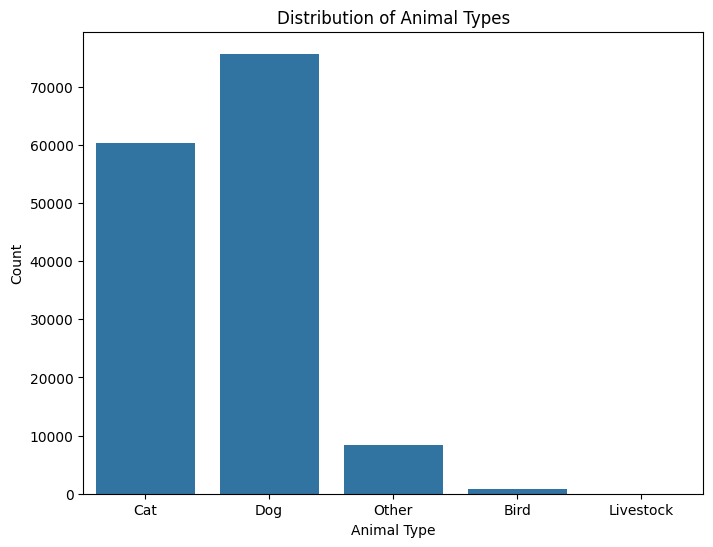

In [127]:
# Visualizing distribution of animal types
plt.figure(figsize=(8, 6))
sns.countplot(x='Animal Type', data=intakes_df)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

**Note:** The above graph is the distribution of animal types. The most common type of animal is the dog. There are approximately 80,000 dogs compared to 60,000 cats. Other animal types including livestock, birds and other animals come in at around 20,000 each.

#### **3.) Distribution of sex upon intake**

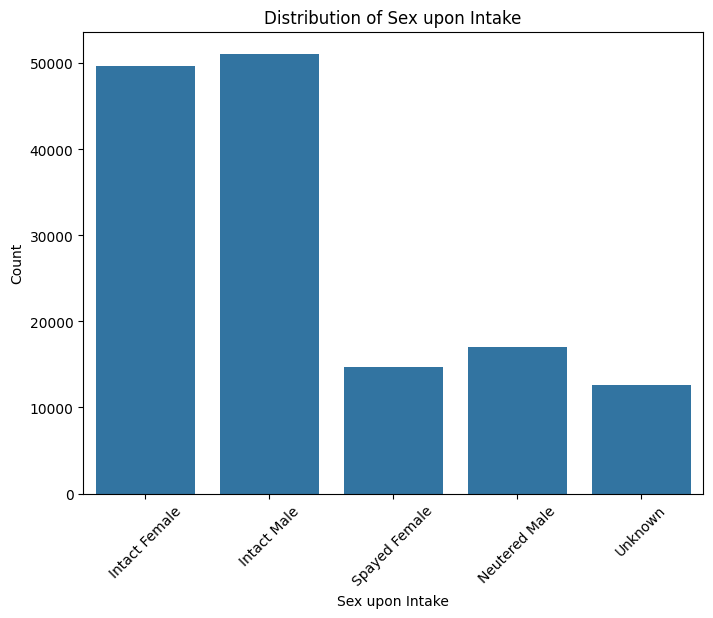

In [128]:
# Visualizing distribution of sex upon intake
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex upon Intake', data=intakes_df)
plt.title('Distribution of Sex upon Intake')
plt.xlabel('Sex upon Intake')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Note:** The above graph is a bar graph showing the distribution of sex upon intake at an animal shelter. The x-axis shows the sex of the animal upon intake, and the y-axis shows the count. The text at the bottom of the graph clarifies that "Unknown" refers to animals where the sex was not recorded upon intake.

**Analysis**
- Intact males and intact females appear to be the most common categories.
- The number of unknown sex animals is relatively low compared to the other categories.

#### **4.) Distribution of intake conditions**

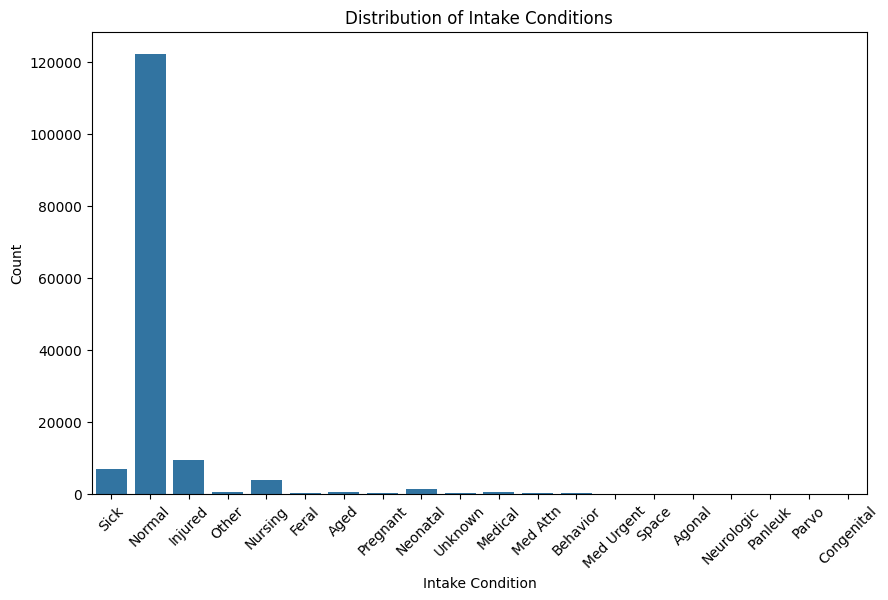

In [129]:
# Visualizing distribution of intake conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Intake Condition', data=intakes_df)
plt.title('Distribution of Intake Conditions')
plt.xlabel('Intake Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Note:** The graph showcases various intake conditions for animals.
The most common condition appears to be “Normal”, which has the highest count.

#### **5.) Distribution of colors (showing top 10)**

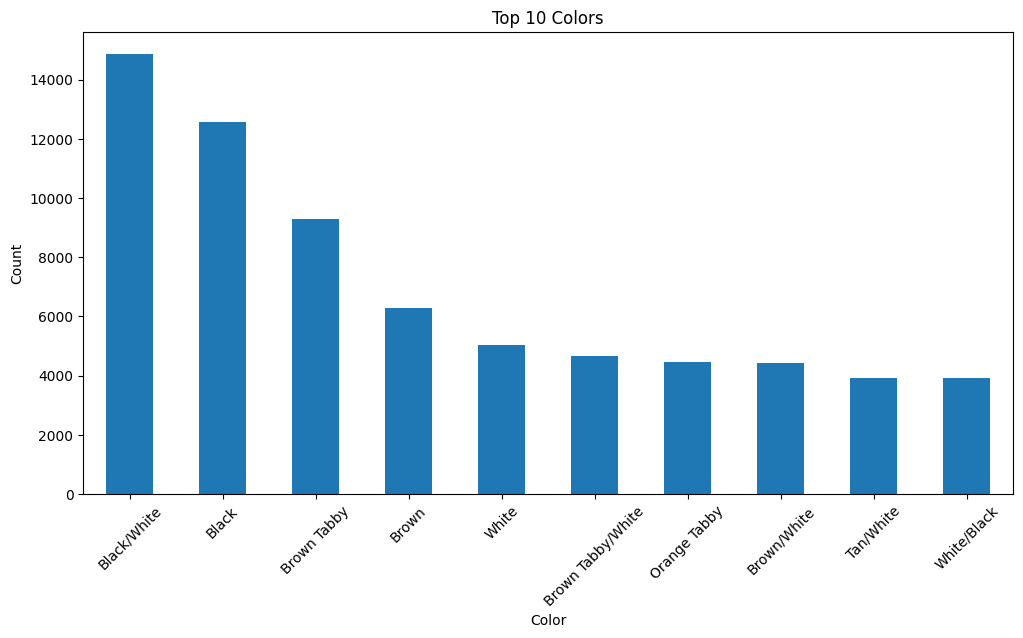

In [130]:
# Visualizing distribution of colors (showing top 10)
plt.figure(figsize=(12, 6))
intakes_df['Color'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **b.) Outcomes**

In [131]:
outcomes_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


**These are the columns present in the `outcomes_df`**
1. **Animal ID:** This column likely serves as a unique identifier for each animal outcome record. We can check for duplicates to ensure data integrity.
2. **Name:** This column contains the name of the animal, if available. We can explore the distribution of named vs. unnamed animals.
3. **DateTime:** This column indicates the date and time of the outcome. We can extract insights such as the distribution of outcome over time.
4. **MonthYear:** Similar to DateTime, but possibly aggregated at the month level. We can explore seasonal trends in animal outcome.
5. **Outcome Type:** Type of outcome (adoption, transfer, euthanasia, etc). We can explore what happened to the animal ie whether it was adopted, Transferred etc.
6. **Outcome Subtype:** This column describes Subtype of outcome (reason behind certain outcome types). We can analyze reason behind an animal getting adopted.
7. **Animal Type:** Indicates the type of animal, e.g., dog, cat, etc. We can explore the composition of different animal types.
8. **Sex upon Outcome:** Indicates the sex of the animal at outcome, e.g., neutered male, intact female, etc. We can analyze the distribution of sexes.
9. **Age upon Outcome:** Describes the Age of animal at outcome. We can explore the distribution of ages and possibly derive insights about age demographics at outcome.
10. **Breed:** Indicates the breed of the animal. We can analyze the diversity of breeds and possibly identify common breeds.
11. **Color:** Describes the color of the animal. We can analyze the distribution of colors and identify common color patterns.

In [132]:
# Cleaning the dataset
# Replacing NaN values with appropriate placeholders
outcomes_df.fillna(value='Unknown', inplace=True)
# Cleaning null values
outcomes_df.dropna(inplace=True)
# Removing duplicates
outcomes_df.drop_duplicates(inplace=True)

#### **1.) Distribution of Outcome Types**

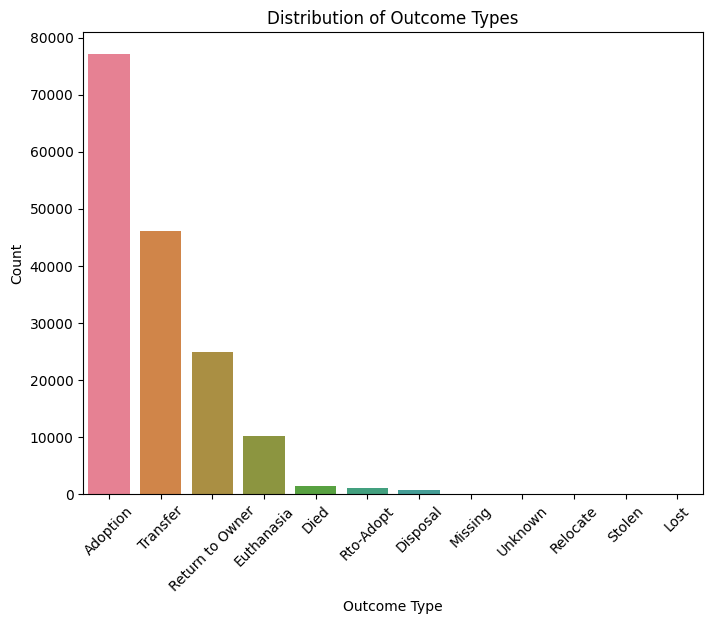

In [133]:
outcome_distribution = outcomes_df['Outcome Type'].value_counts()

# Plotting the distribution of outcome types
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome_distribution.index, y=outcome_distribution.values, hue=outcome_distribution.index, legend=False)
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Note:**
- Adoption: The most common outcome, where animals find new homes and families.
- Transfer to Rescue: Animals are transferred to rescue organizations for further care and adoption.
- Return to Owners: Animals are reunited with their original owners.
- Euthanasia: Unfortunately, some animals are humanely euthanized due to various reasons.
- Died: A somber outcome indicating the passing of an animal.
- Disposal: This category likely includes cases where animals are disposed of after passing away.

Notably, Austin, TX is recognized as the largest “No Kill” city in the country, with over 90% of animals entering the center being adopted, transferred, or returned to their owners.

(Source: https://www.opendatanetwork.com/dataset/data.austintexas.gov/9t4d-g238)

#### **2.) Distribution of animal types across different outcome types**

Animal Type      Bird    Cat    Dog  Livestock  Other
Outcome Type                                         
Adoption          294  31785  44104         13    895
Died               30    890    366          1    224
Disposal           32    128     78          0    545
Euthanasia        141   2374   2080          2   5618
Lost                1      1      0          0      0
Missing             1     45     35          0      5
Relocate           10      6      0          0     11
Return to Owner    56   2688  22014          6     70
Rto-Adopt           0    233    897          0      3
Stolen              0      0      5          0      0
Transfer          246  25033  19674          6   1077
Unknown             1      9     20          0      6


<Figure size 1200x800 with 0 Axes>

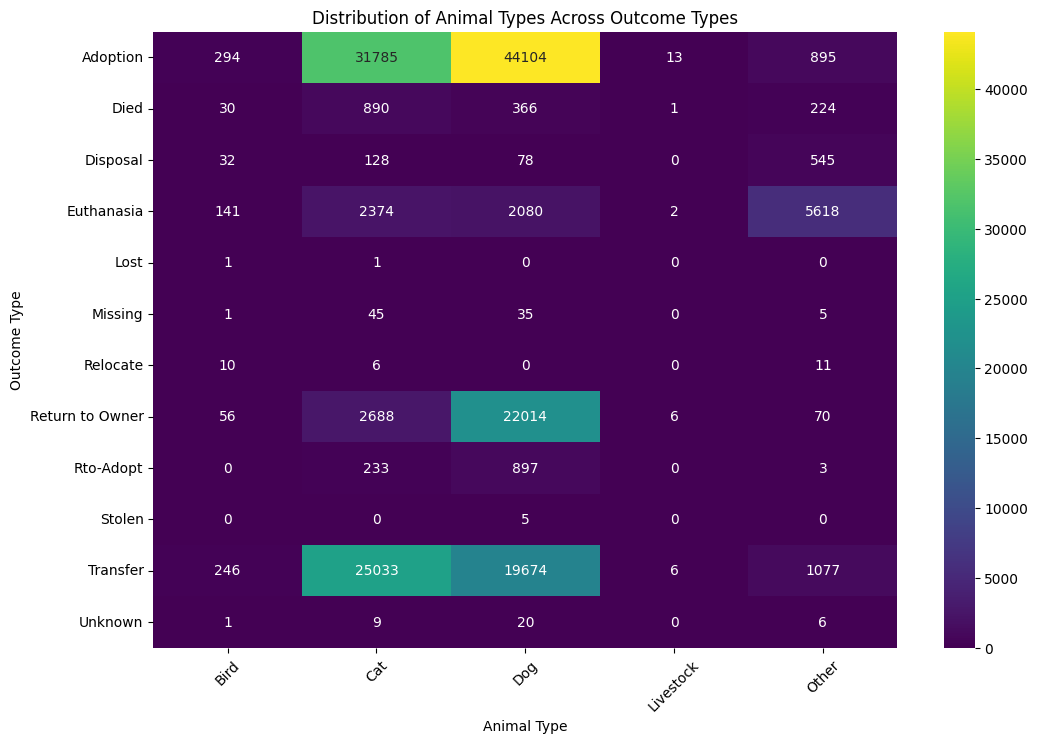

In [134]:
plt.figure(figsize=(12, 8))

# Grouping by Outcome Type and Animal Type and getting counts
animal_type_distribution = outcomes_df.groupby(['Outcome Type', 'Animal Type']).size().unstack(fill_value=0)
print(animal_type_distribution)

# Generating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(animal_type_distribution, cmap='viridis', annot=True, fmt='d')
plt.title('Distribution of Animal Types Across Outcome Types')
plt.xlabel('Animal Type')
plt.ylabel('Outcome Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


**Note:** The above heatmap illustrates the Distribution of Animal Types Across Outcome Types.

1. **Adoption:**
- Cats and dogs are the most commonly adopted animals.
- The adoption rate for cats is particularly high.
2. **Transfer to Rescue:**
- Cats and dogs are also frequently transferred to rescue organizations.
3. **Return to Owners:**
- Dogs have a significant number of returns to their original owners.
4. **Euthanasia:**
- Unfortunately, some animals undergo euthanasia.
5. **Other Outcomes:**
- There are smaller counts for livestock, birds, and other animals across various outcomes.

#### **3. Age distribution of animals upon outcome**

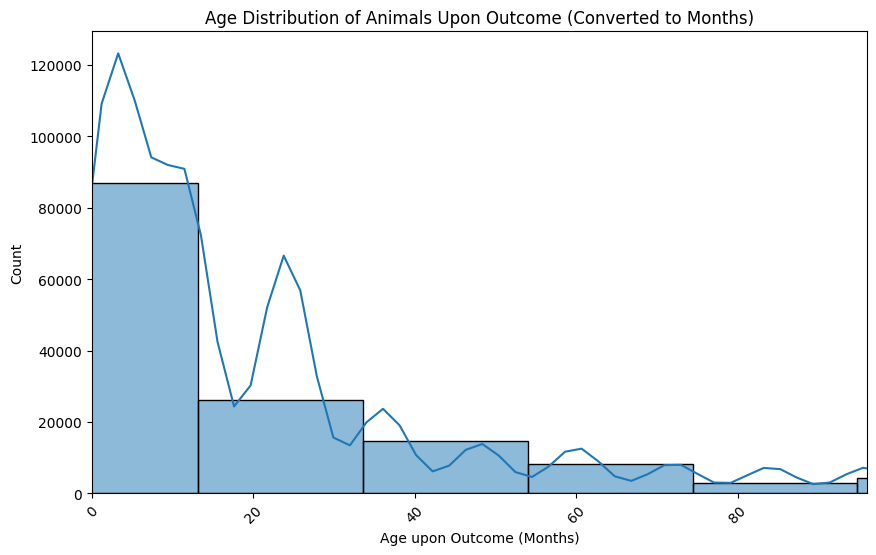

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converting ages to months with error handling
def convert_to_months(age):
    try:
        if 'year' in age:
            return int(age.split()[0]) * 12
        elif 'month' in age:
            return int(age.split()[0])
        else:
            return None
    except (AttributeError, ValueError):
        return None

# Creating a new DataFrame with the 'Age in Months' column added
outcomes_df_age = outcomes_df.copy()  # Make a copy to keep the original DataFrame intact
outcomes_df_age['Age in Months'] = outcomes_df_age['Age upon Outcome'].apply(convert_to_months)

# Selecting top 15 age values
top_age_values = outcomes_df_age['Age in Months'].value_counts().nlargest(15)

# Plotting the age distribution of animals upon outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=outcomes_df_age, x='Age in Months', bins=20, kde=True)
plt.title('Age Distribution of Animals Upon Outcome (Converted to Months)')
plt.xlabel('Age upon Outcome (Months)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Displaying only top 15 age values
plt.xlim(left=0, right=top_age_values.index.max())

plt.show()


**Note:** 
1. A significant number of animals fall into the age categories of under 5 months and around 10 months old. These age groups seem to be particularly relevant when considering the outcomes for animals.Younger animals, especially those under 1 year old, tend to have a higher likelihood of adoption. This aligns with the intuition that younger animals are more easily adopted. 
2. Additionally, the time spent in the shelter also plays a role: younger animals that spent longer in the shelter (i.e., were younger upon intake) had a higher likelihood of adoption. For older animals, the intake condition becomes a more important predictor. When the intake condition is normal, adoption preferences seem consistent. Smaller-sized dogs that were younger upon intake also have a higher likelihood of getting adopted

#### **4.) Distribution of top 5 animal types across the top 5 outcome types**

In [136]:
# Keeping only the top 5 outcome types
top_outcome_types = outcomes_df['Outcome Type'].value_counts().nlargest(5).index

# Filtering the DataFrame to include only the top 5 outcome types
outcomes_df_top5 = outcomes_df[outcomes_df['Outcome Type'].isin(top_outcome_types)]

# Grouping by Animal Type and Outcome Type and getting counts
animal_outcome_counts = outcomes_df_top5.groupby(['Animal Type', 'Outcome Type']).size().unstack(fill_value=0)

# Selecting top 5 animal types for each outcome type
top_animal_types = {}
for outcome_type in animal_outcome_counts.columns:
    top_animal_types[outcome_type] = animal_outcome_counts[outcome_type].nlargest(5)

# Creating a DataFrame with the top 5 animal types for each outcome type
top_animal_types_df = pd.DataFrame(top_animal_types)

# Printing the summary
print("Top 5 Animal Types Across Top 5 Outcome Types:")
print(top_animal_types_df)


Top 5 Animal Types Across Top 5 Outcome Types:
             Adoption  Died  Euthanasia  Return to Owner  Transfer
Animal Type                                                       
Bird              294    30         141               56       246
Cat             31785   890        2374             2688     25033
Dog             44104   366        2080            22014     19674
Livestock          13     1           2                6         6
Other             895   224        5618               70      1077


**Note:** The above table shows the outcomes for different types of animals (Bird, Cat, Dog, Livestock, Other) across various outcome categories (Adoption, Died, Euthanasia, Return to Owner, Transfer). Here are the key insights:

1. **Adoption:**
- Cats and dogs have the highest adoption numbers.
- Birds and livestock have relatively lower adoption rates.
2. **Died:**
- Cats and dogs also account for the majority of deaths.
- Other animals have a smaller number of deaths.
3. **Euthanasia:**
- Cats and dogs are most commonly euthanized.
- Other animals have minimal euthanasia cases.
4. **Return to Owner:**
- Dogs have a significant number of returns to their original owners.
- Cats also have some returns.
5. **Transfer:**
- Cats and dogs are frequently transferred to other facilities or organizations.

### **c.) Stray Maps**

In [137]:
straymap_df.head()

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
0,A899578,6301 CROWLEY TRAIL\nAUSTIN 78729\n(30.44333598...,Yes (come to the shelter),03/06/2024,Dog,Labrador Retriever,White,Intact Male,7 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A89...
1,A706846,"6402 NAVARRO CREEK78617\n(30.165188983, -97.59...",Yes (come to the shelter),03/07/2024,Dog,Chihuahua Shorthair/Pug,Sable/Black,Neutered Male,8 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A70...
2,A884594,"KEMP STREET AUSTIN 78741\n(30.2391611, -97.730...",Yes (come to the shelter),03/05/2024,Dog,Jack Russell Terrier Mix,White/Tan,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A88...
3,A898024,"PATTON LANE AUSTIN 78723\n(30.2935393, -97.699...",Yes (come to the shelter),03/01/2024,Dog,Pit Bull Mix,Brown/White,Spayed Female,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A89...
4,A899499,"5801 AINEZ DR\nAUSTIN 78744\n(30.185944, -97.7...",Yes (come to the shelter),03/05/2024,Dog,German Shepherd/Anatolian Shepherd,Brown/Black,Intact Female,8 weeks,http://www.petharbor.com/pet.asp?uaid=ASTN.A89...


In [138]:
# Summary statistics for numerical columns
print(straymap_df.describe())

       Animal ID                                     Found Location  \
count         87                                                 87   
unique        87                                                 75   
top      A899578  4475 BRANDT RD\nAUSTIN 78744\n(30.159396653, -...   
freq           1                                                  4   

                           At AAC Intake Date Type          Looks Like  \
count                          87          87   87                  87   
unique                          2           7    2                  37   
top     Yes (come to the shelter)  03/04/2024  Dog  Domestic Shorthair   
freq                           75          20   54                  23   

              Color          Sex      Age  \
count            87           87       87   
unique           37            5       21   
top     Black/White  Intact Male  2 years   
freq             10           34       18   

                                               

In [139]:
straymap_df.columns

Index(['Animal ID', 'Found Location', 'At AAC', 'Intake Date', 'Type',
       'Looks Like', 'Color', 'Sex', 'Age', 'Image Link'],
      dtype='object')

**These are the columns present in the `straymap_df`**
- **Animal ID**: This column likely serves as a unique identifier for each animal in the dataset. It is used to track individual animals across different records and datasets.
- **Found Location**: This column describes the location where the animal was found. It provides geographical information about where the animal was discovered or captured.
- **At AAC**: This column indicates whether the animal was brought to the Austin Animal Center (AAC). It likely contains binary values (Yes/No) indicating whether the animal was taken to the shelter.
- **Intake Date**: This column records the date when the animal was taken into the shelter or when the intake process began.
- **Type**: This column specifies the type of animal, such as dog or cat. It categorizes animals based on their species.
- **Looks Like**: This column provides information about the breed or appearance of the animal. It may contain textual descriptions of the animal's physical characteristics.
- **Color**: Describes the color or color pattern of the animal's fur or skin.
- **Sex**: Indicates the sex of the animal, such as male or female.
- **Age**: Describes the age of the animal at the time of intake. It may include information such as years, months, or weeks.
- **Image Link**: This column contains links to images of the animal. It may be used for reference or visual identification purposes.
- **Latitude**: Provides the latitude coordinate of the found location. This information helps to pinpoint the geographic location of where the animal was found.
- **Longitude**: Provides the longitude coordinate of the found location. Similar to latitude, this information helps to precisely locate where the animal was found on a map.


In [140]:
# Extracting the latitude and Longitude where the animal was found
import re

# Defining a function to extract coordinates using regex
def extract_coordinates(location):
    match = re.search(r'\((-?\d+\.\d+), (-?\d+\.\d+)\)', location)
    if match:
        return float(match.group(1)), float(match.group(2))
    else:
        return None, None

# Applying the function to the "Found Location" column of straymap_df
straymap_df['Latitude'], straymap_df['Longitude'] = zip(*straymap_df['Found Location'].apply(extract_coordinates))

# Displaying the DataFrame with extracted coordinates
print(straymap_df[['Animal ID', 'Latitude', 'Longitude']])


   Animal ID   Latitude  Longitude
0    A899578  30.443336 -97.744826
1    A706846  30.165189 -97.594320
2    A884594  30.239161 -97.730186
3    A898024  30.293539 -97.699996
4    A899499  30.185944 -97.737594
..       ...        ...        ...
82   A899442  30.376642 -97.711361
83   A899223  30.193957 -97.743950
84   A899577  30.232277 -97.736292
85   A899523  30.330652 -97.676263
86   A899637  30.281990 -97.703610

[87 rows x 3 columns]


In [141]:
# Cleaning the dataset
# Replacing NaN values with appropriate placeholders
straymap_df.fillna(value=0, inplace=True)
# Cleaning null values
straymap_df.dropna(inplace=True)
# Removing duplicates
straymap_df.drop_duplicates(inplace=True)

In [142]:
# Checking for missing values
print(straymap_df.isnull().sum())

Animal ID         0
Found Location    0
At AAC            0
Intake Date       0
Type              0
Looks Like        0
Color             0
Sex               0
Age               0
Image Link        0
Latitude          0
Longitude         0
dtype: int64


In [143]:
# Displaying the coordinates on map
import folium

# Creating a map centered at an average location
map_center = [straymap_df['Latitude'].mean(), straymap_df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Adding markers for each coordinate
for index, row in straymap_df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Animal ID']).add_to(mymap)

# Save the map as an HTML file
mymap.save("stray_animals_map.html")

# Display the map
display(mymap)


**Note:** Please scroll to the left to see the pointers
- **Urban Concentration:** The blue pointers on the map predominantly cluster around urban areas. This suggests that stray animals are more commonly found in densely populated regions.
- **Human Interaction:** The concentration of stray animal findings near urban centers implies a close interaction between humans and these animals. Urban environments often provide food sources and shelter for strays, leading to their presence in these areas.
- **Potential Interventions**: Identifying these hotspots can guide efforts to address the issue of stray animals. Local authorities and animal welfare organizations could focus on targeted interventions such as sterilization programs, adoption drives, and education campaigns in these specific locations.
- **Data for Action:** The map serves as valuable data for policymakers and animal advocates. By understanding where stray animals are most prevalent, they can allocate resources effectively and implement strategies to improve the welfare of these animals.

### **Merging all the three `intakes`, `outakes`, `stray` Dataframes**

In [144]:
# Merging Strayed animals dataset and outcomes dataset using inner join
merged_df = pd.merge(straymap_df, outcomes_df, on='Animal ID', how='inner')

In [145]:
# Merging Strayed animals dataset and incomes dataset using inner join
merged_df = pd.merge(merged_df, intakes_df, on='Animal ID', how='inner', suffixes=('_outcome', '_intake'))

In [146]:
# Dropping the columns not required for analysis
merged_df.drop(columns=['At AAC', 'Color_x','Sex','Image Link','DateTime_intake','MonthYear_intake'], inplace=True)

In [147]:
# Clean the dataset
# Replace NaN values with appropriate placeholders
merged_df.fillna(value=' ', inplace=True)
# Clean null values
merged_df.dropna(inplace=True)
# Remove duplicates
merged_df.drop_duplicates(inplace=True)

In [148]:
merged_df.head()

,Animal ID,Found Location_outcome,Intake Date,Type,Looks Like,Age,Latitude,Longitude,Name_outcome,DateTime_outcome,...,Color_y,Name_intake,Found Location_intake,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,Age upon Intake,Breed_intake,Color
0,A899578,6301 CROWLEY TRAIL\nAUSTIN 78729\n(30.44333598...,03/06/2024,Dog,Labrador Retriever,7 months,30.443336,-97.744826,*Lil Taki,03/24/2024 05:04:00 PM,...,White,*Lil Taki,Outside Jurisdiction,Owner Surrender,Normal,Dog,Neutered Male,7 months,Pointer,White
1,A899578,6301 CROWLEY TRAIL\nAUSTIN 78729\n(30.44333598...,03/06/2024,Dog,Labrador Retriever,7 months,30.443336,-97.744826,*Lil Taki,03/14/2024 01:56:00 PM,...,White,*Lil Taki,Outside Jurisdiction,Owner Surrender,Normal,Dog,Neutered Male,7 months,Pointer,White
2,A899578,6301 CROWLEY TRAIL\nAUSTIN 78729\n(30.44333598...,03/06/2024,Dog,Labrador Retriever,7 months,30.443336,-97.744826,*Lil Taki,03/25/2024 01:35:00 PM,...,White,*Lil Taki,Outside Jurisdiction,Owner Surrender,Normal,Dog,Neutered Male,7 months,Pointer,White
3,A706846,"6402 NAVARRO CREEK78617\n(30.165188983, -97.59...",03/07/2024,Dog,Chihuahua Shorthair/Pug,8 years,30.165189,-97.594320,Mugsie,08/30/2015 12:48:00 PM,...,Sable/Black,Mugsie,7201 Levander Loop in Austin (TX),Stray,Nursing,Dog,Intact Male,0 years,Chihuahua Shorthair/Pug,Sable/Black
4,A706846,"6402 NAVARRO CREEK78617\n(30.165188983, -97.59...",03/07/2024,Dog,Chihuahua Shorthair/Pug,8 years,30.165189,-97.594320,Mugsie,03/12/2024 03:44:00 PM,...,Sable/Black,Mugsie,7201 Levander Loop in Austin (TX),Stray,Nursing,Dog,Intact Male,0 years,Chihuahua Shorthair/Pug,Sable/Black


## **Analysis**

#### **1.) What are the most common outcome for strayed animals**

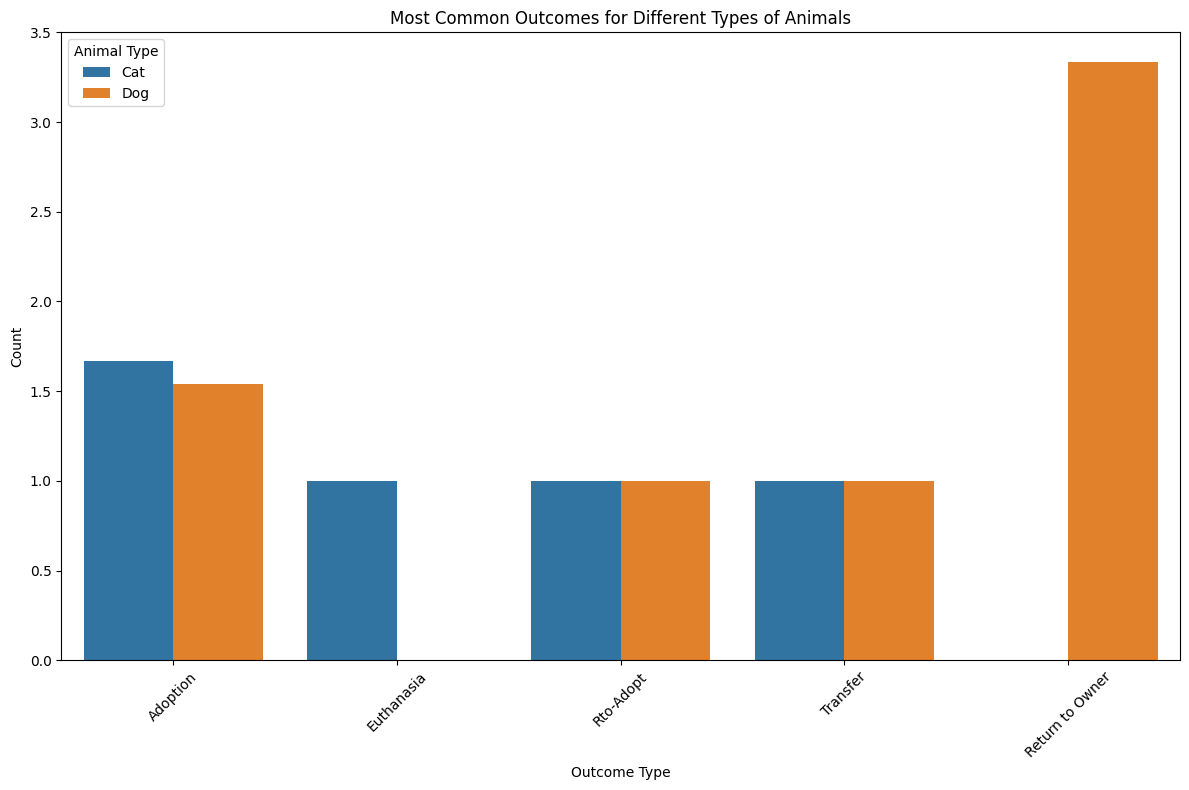

Sum of counts for each outcome type within each animal type:
Type  Outcome Type   
Cat   Adoption           15
      Euthanasia          3
      Rto-Adopt           1
      Transfer            5
Dog   Adoption           40
      Return to Owner    10
      Rto-Adopt           2
      Transfer            5
Name: Count, dtype: int64


In [161]:
# Grouping by Animal Type, Outcome Type, Age, and Breed and getting counts
outcome_distribution = merged_df.groupby(['Type', 'Outcome Type', 'Age', 'Breed_outcome']).size().reset_index(name='Count')

# Filtering the top 10 most common outcome types
top_outcome_types = outcome_distribution['Outcome Type'].value_counts().nlargest(10).index
outcome_distribution_top10 = outcome_distribution[outcome_distribution['Outcome Type'].isin(top_outcome_types)]

# Plotting a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Outcome Type', y='Count', hue='Type', data=outcome_distribution_top10, errorbar=None)
plt.title('Most Common Outcomes for Different Types of Animals')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Animal Type')
plt.tight_layout()
plt.show()

# Calculate the sum of counts for each outcome type within each animal type
sum_counts = outcome_distribution_top10.groupby(['Type', 'Outcome Type'])['Count'].sum()

# Print the sum of counts for each outcome type within each animal type
print("Sum of counts for each outcome type within each animal type:")
print(sum_counts)

**Note:** 
1. **Comparison of Outcomes for Cats and Dogs:**
- The bar chart visually compares the most common outcomes for cats and dogs.
- Dogs are more frequently returned to owners, while cats are more commonly adopted.
- This suggests that dogs have a higher likelihood of being reunited with their owners, whereas cats are often chosen for adoption.
2. **Pet Adoption Statistics::**
- The chart highlights the importance of adoption for cats, as they are less likely to be returned to owners.
- It underscores the need for promoting cat adoption and finding loving homes for these animals.
3. **Potential Implications:**
- Animal shelters and rescue organizations can use this data to tailor their efforts.
- For dogs, focus on reuniting them with owners through microchipping and effective communication.
- For cats, prioritize adoption campaigns and create a positive perception of adopting feline companions.

#### **2.) What are the most common breeds of strayed animals in the dataset?**

In [150]:
# Counting the occurrences of each breed
breed_counts = merged_df['Breed_outcome'].value_counts()

# Displaying the top 10 most common breeds
top_breeds = breed_counts.head(10)
print("Top 10 most common breeds of strayed animals:")
print(top_breeds)

Top 10 most common breeds of strayed animals:
Breed_outcome
Domestic Shorthair         17
Pit Bull                    6
Chihuahua Shorthair Mix     5
Labrador Retriever Mix      4
Pointer                     3
Labrador Retriever          3
Siberian Husky              3
German Shepherd             3
Domestic Medium Hair        3
Pit Bull Mix                3
Name: count, dtype: int64


**Note:**
1. **Top 10 Breeds of Strayed Animals:**
- The data lists the most common breeds of strayed animals.
- The Domestic Shorthair breed tops the list with 16 occurrences.
- Other notable breeds include Chihuahua Shorthair Mix, Labrador Retriever Mix, and Domestic Medium Hair.
2. **Pet Abandonment or Loss:**
- The high count of strayed animals suggests an issue of pet abandonment or loss.
- Pet owners should be encouraged to microchip their animals and provide proper identification to prevent straying.
3. **Shelter and Adoption Efforts:**
- Animal shelters can focus on these common breeds for adoption campaigns.
- Promoting responsible pet ownership and spaying/neutering can help reduce the number of strays.

#### **3.) Is there a correlation between the age of strayed animals upon intake and their outcomes?**

In [151]:
# Convert 'Age' and 'Age upon Outcome' to numerical values
merged_df['Age'] = merged_df['Age'].str.extract('(\d+)').astype(float)
merged_df['Age upon Outcome'] = merged_df['Age upon Outcome'].str.extract('(\d+)').astype(float)

# Calculate correlation
age_outcome_corr = merged_df['Age'].corr(merged_df['Age upon Outcome'])
print("Correlation between age upon intake and age upon outcome:", age_outcome_corr)


Correlation between age upon intake and age upon outcome: 0.4999988674778523


**Note:** The correlation coefficient between the age of an animal upon intake and its age upon outcome is approximately 0.50. This value suggests a moderate positive correlation between these two variables

We can leverage the correlation between age upon intake and age upon outcome to enhance shelter management:

1. **Adoption Strategies:**
- Targeted Age Groups: Based on the positive correlation, shelters can focus on specific age groups. For instance:
  - Young Animals: Promote the adoption of younger animals (puppies and kittens) to increase their chances of finding forever homes.
  - Middle-Aged Animals: Highlight the benefits of adopting middle-aged pets (e.g., 2-7 years old) as they often have established behavior and health patterns.
2. **Age-Appropriate Marketing:**
- Tailor adoption marketing materials to emphasize the age-related advantages of each group.
3. **Healthcare and Vaccination:**
- Early Interventions: Address health issues promptly upon intake. Younger animals may need vaccinations, deworming, and spaying/neutering.
- Senior Care: Older animals require specialized care. Regular health check-ups, dental care, and joint supplements can improve their quality of life.
4. **Foster Programs:**
- Age-Specific Fostering: Encourage foster programs for different age categories. Foster families can provide individualized attention and socialization.
- Senior Foster Homes: Match senior animals with foster homes where they can receive personalized care.
5. **Behavioral Training:**
- Age-Appropriate Training: Recognize that training needs vary by age. Puppies and kittens need basic obedience training, while older animals may benefit from behavior modification.
- Socialization: Focus on socializing young animals to prevent behavioral issues later.
6. **Matching Adopters and Pets:**
- Lifestyle Considerations: Consider adopters’ lifestyles. Younger animals may be more energetic, while seniors may prefer a quieter environment.

#### **4.) Where are the most common found locations for strayed animals?**

In [152]:
# Count the occurrences of each found location
location_counts = merged_df['Found Location_intake'].value_counts()

# Display the top 10 most common found locations
top_locations = location_counts.head(10)
print("Top 10 most common found locations for strayed animals:")
print(top_locations)


Top 10 most common found locations for strayed animals:
Found Location_intake
20213 Camargo Court in Travis (TX)      6
4475 Brandt Rd in Austin (TX)           4
Austin (TX)                             4
Outside Jurisdiction                    3
Pflugerville (TX)                       2
10809 Trail Weary Dr in Austin (TX)     2
7201 Levander Loop in Austin (TX)       2
9508 Nightstar Dr in Travis (TX)        2
South Turnsville Road in Travis (TX)    2
6100 Tasajillo Trail in Austin (TX)     2
Name: count, dtype: int64


**Note:**
- Conduct targeted outreach, education campaigns, and door-to-door efforts in hotspot neighborhoods like Camargo Court, Brandt Road, and Trail Weary Drive to promote responsible pet ownership and the importance of microchipping.
- Increase patrolling, monitoring, and enforcement in these areas through collaboration with animal control and law enforcement agencies.
- Partner with local community organizations, businesses, and residents to raise awareness, organize adoption events, and implement trap-neuter-return (TNR) programs for stray cats.

#### **5.) What is the age distribution of strayed animals at intake and at outcome?**

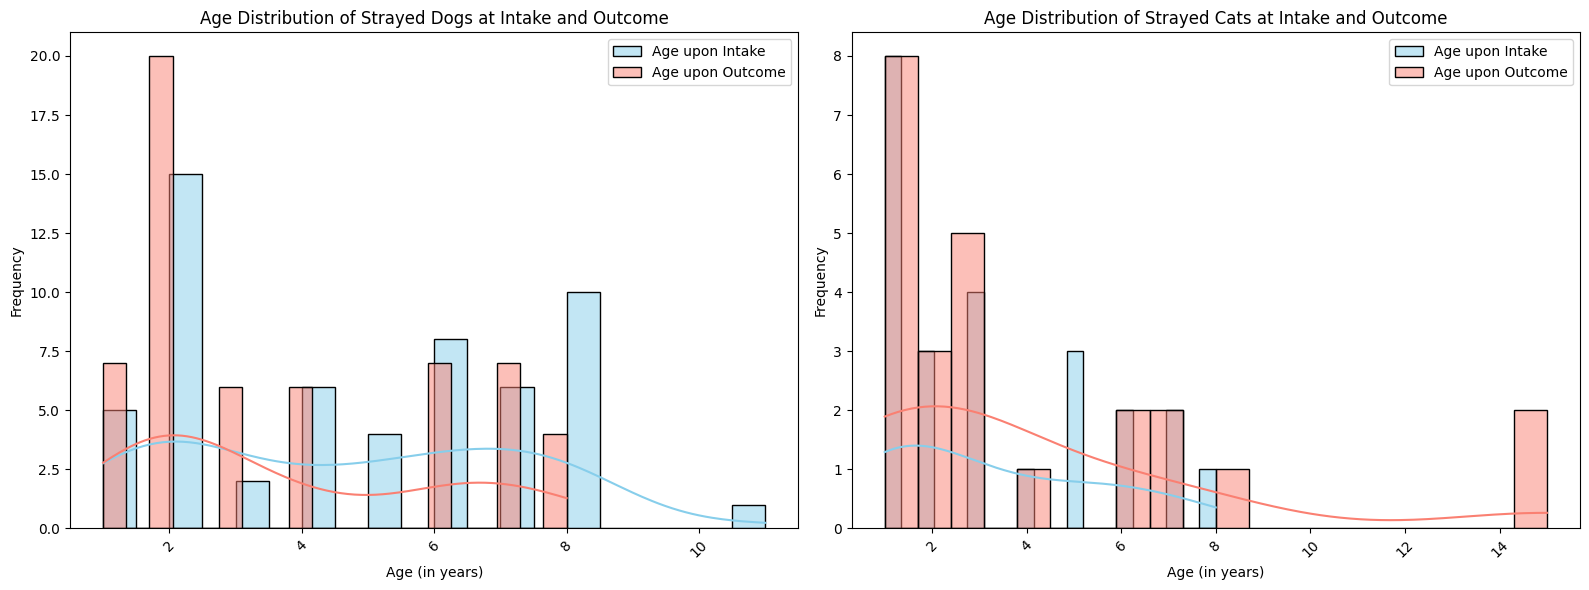

In [160]:
# Filtering DataFrame for only dogs and cats
dogs_df = merged_df[merged_df['Type'] == 'Dog']
cats_df = merged_df[merged_df['Type'] == 'Cat']

# Creating a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting histogram for age distribution at intake and at outcome for dogs
sns.histplot(data=dogs_df, x='Age', bins=20, kde=True, color='skyblue', label='Age upon Intake', ax=axes[0])
sns.histplot(data=dogs_df, x='Age upon Outcome', bins=20, kde=True, color='salmon', label='Age upon Outcome', ax=axes[0])
axes[0].set_title('Age Distribution of Strayed Dogs at Intake and Outcome')
axes[0].set_xlabel('Age (in years)')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees
axes[0].legend()

# Plotting histogram for age distribution at intake and at outcome for cats
sns.histplot(data=cats_df, x='Age', bins=20, kde=True, color='skyblue', label='Age upon Intake', ax=axes[1])
sns.histplot(data=cats_df, x='Age upon Outcome', bins=20, kde=True, color='salmon', label='Age upon Outcome', ax=axes[1])
axes[1].set_title('Age Distribution of Strayed Cats at Intake and Outcome')
axes[1].set_xlabel('Age (in years)')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees
axes[1].legend()

# Adjusting layout to prevent overlap
plt.tight_layout()

plt.show()

**Note:** 
The above chart illustrates the age distribution of strayed animals at intake and outcome.

1. **Age Groups:**
- The x-axis represents different age groups of animals.
2. **Intake and Outcome:**
- The y-axis represents the number of animals falling into each age group.
- The bar graph shows the intake count of animals in each age group.
- The line graph represents the outcome count of animals in the same age groups.
3. **Observations:**
- There is a significant number of young animals (puppies, kittens) at intake.
- As age increases, the number of animals declines.
- The outcome line may show trends such as adoptions, transfers, or returns to owners.

#### **6.) What is the distribution of outcome types for different intake conditions?**

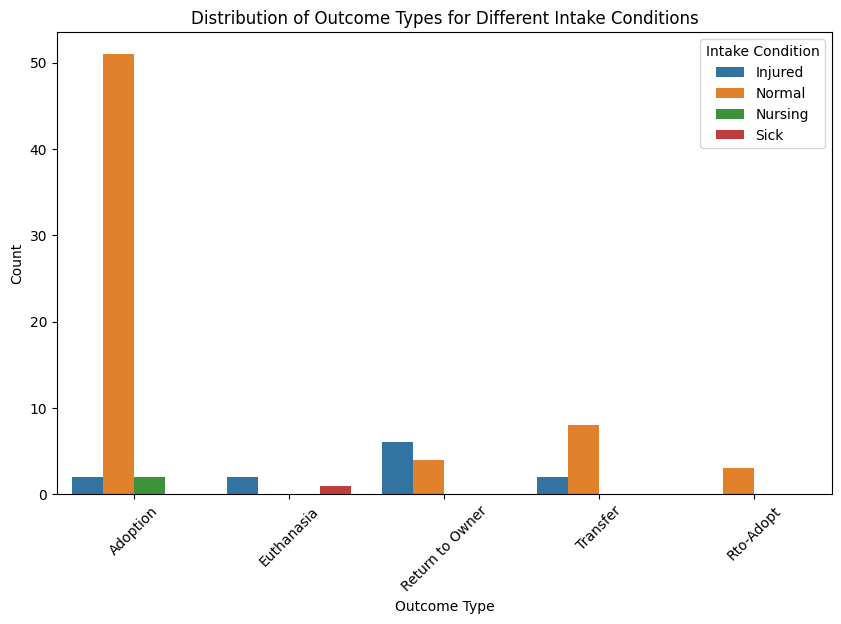

In [115]:
# Group by intake condition and outcome type, then calculate counts
outcome_distribution_condition = merged_df.groupby(['Intake Condition', 'Outcome Type']).size().reset_index(name='Count')

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Outcome Type', y='Count', hue='Intake Condition', data=outcome_distribution_condition)
plt.title('Distribution of Outcome Types for Different Intake Conditions')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Intake Condition')
plt.show()


**Note:** The above graph displays the distribution of different outcome types for animals at the Austin Animal Center based on their intake condition. The y-axis represents the count or frequency of each outcome, while the x-axis shows the various outcome categories. 

The graph compares the distribution of outcomes for different intake conditions. For example, the "Normal" intake condition seems to have a higher frequency of adoptions compared to the other intake conditions. Additionally, the "Injured" and "Sick" intake conditions have relatively lower adoption counts, indicating that health status may play a role in the likelihood of adoption.

## **Actionable Insights based On Above Analysis**

1. **Adoption Strategies:**
- Focus on promoting the adoption of other animals (birds, live stock); As cats and dogs have the highest adoption rates compared to other animal types.
- Target specific age groups for adoption campaigns, such as animals under 5 months and around 10 months, as these age groups have a higher likelihood of adoption.
- Develop specialized adoption programs for animals with "Normal" intake conditions, as they have a higher chance of being adopted compared to injured, sick, or nursing animals.

2. **Resource Allocation:**
- Allocate more resources (medical care, staff, facilities) towards animals with "Injured," "Sick," or "Nursing" intake conditions, as they have lower adoption rates and may require additional support.
- Concentrate efforts on urban areas where stray animals are more commonly found, as identified by the stray animal hotspot map.
- Prioritize sterilization programs, education campaigns, and adoption drives in these urban hotspots to address the root causes of stray animal populations.
- Invest in microchipping and identification programs for dogs, as they have a higher likelihood of being returned to owners compared to cats.

3. **Adoption Patterns and Areas for Improvement:**
- Enhance efforts to reunite dogs with their owners, such as improving communication channels and promoting microchipping.
- Develop targeted marketing campaigns to promote cat adoptions, as cats are less likely to be returned to owners compared to dogs.
- Address the issue of pet abandonment or loss, as indicated by the high number of strayed animals, particularly breeds like Domestic Shorthair, Chihuahua Shorthair Mix, and Labrador Retriever Mix.
- Improve data collection and record-keeping practices, especially for animals with "Unknown" sex or intake conditions, to better understand their outcomes and tailor strategies accordingly.

4. **Foster Programs and Behavioral Training:**
- Implement age-specific foster programs to provide individualized care and socialization for different age groups.
- Develop behavior modification and training programs tailored to the needs of different age groups and intake conditions.
- Match adopters with suitable pets based on their lifestyles and the age/energy levels of the animals.